# Métricas globales y operaciones básicas DIP

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
import pylab
pylab.rcParams['figure.figsize'] = (3.0, 3.0)

Dimensiones de la imagen:  (512, 512)
Tipo de dato:  uint8
Nivel máximo de intensidad:  253
Nivel mínimo de intensidad:  0


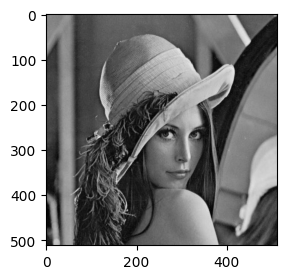

In [2]:
input_image=cv2.imread('lenna.jpg', cv2.IMREAD_GRAYSCALE)
img_max = np.max(input_image)
img_min = np.min(input_image)
print("Dimensiones de la imagen: ", input_image.shape)
print("Tipo de dato: ", input_image.dtype)
print("Nivel máximo de intensidad: ", img_max)
print("Nivel mínimo de intensidad: ", img_min)
plt.imshow(input_image, cmap='gray')
plt.show()

## Métricas globales

### Brillo
Nivel medio de grises en una imagen.

$B=\frac{1}{N\times M}\sum_{i=0}^{N-1}\sum_{j=0}^{M-1}f(i,j)$

In [3]:
def brightness(img): # Para una imagen en escala de grises
    return np.average(img)

def adjust_brightness(img, adjustment): # Aumentar o disminuir el brillo de una imagen en escala de grises
    if adjustment != 0:
        return np.clip((img.astype(np.int16)+adjustment), 0, 255)
    else:
        return img

Brillo imagen original:  99.04318618774414


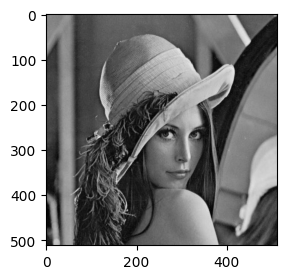

In [4]:
B_input = brightness(input_image)
print("Brillo imagen original: ", B_input)
plt.imshow(input_image, cmap='gray')
plt.show()

Brillo imagen (100):  194.4277000427246


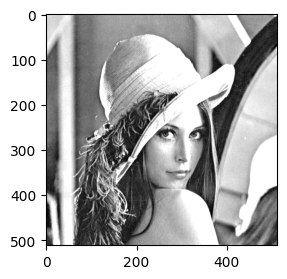

In [5]:
brightness_adjust = 100
bright_image = adjust_brightness(input_image, brightness_adjust)
print(f"Brillo imagen ({brightness_adjust}): ", brightness(bright_image))
plt.imshow(bright_image, cmap='gray')
plt.show()

Brillo imagen (-100)):  21.413284301757812


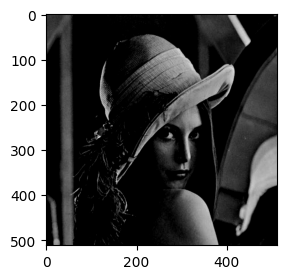

In [8]:
brightness_adjust = -100
dim_image = adjust_brightness(input_image, brightness_adjust)
print(f"Brillo imagen ({brightness_adjust})): ", brightness(dim_image))
plt.imshow(dim_image, cmap='gray')
plt.show()

### Contraste
Variación del nivel de grises en una imagen.

$C=\sqrt{\frac{1}{N\times M}\sum_{i=0}^{N-1}\sum_{j=0}^{M-1}[f(i,j)-B]^2}$

In [9]:
def contrast(img): # Para una imagen en escala de grises
    return np.std(img)

def contrast_adjustment(img, adjustment): # Ajuste de contraste para una imagen en escala de grises
    return np.uint8(np.clip((adjustment * img), 0, 255))

Contraste imagen original:  52.84556868242096


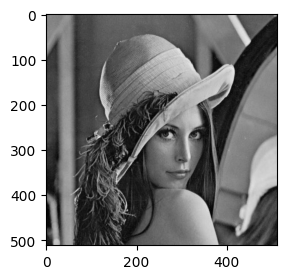

In [10]:
C_input = contrast(input_image)
print("Contraste imagen original: ", C_input)
plt.imshow(input_image, cmap='gray')
plt.show()

Contraste imagen 1.3:  67.5576303709874


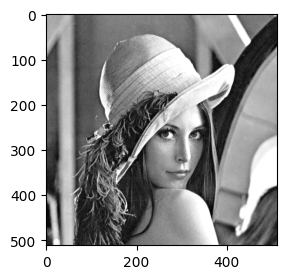

In [11]:
alpha = 1.3
high_contrast = contrast_adjustment(input_image, alpha)
print(f"Contraste imagen {alpha}: ", contrast(high_contrast))
plt.imshow(high_contrast, cmap='gray')
plt.show()

Contraste imagen 0.1:  5.291508729212057


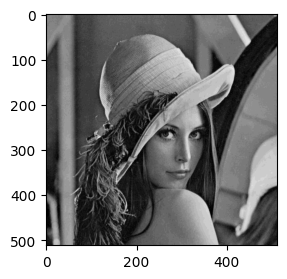

In [12]:
alpha = 0.1
low_contrast = contrast_adjustment(input_image, alpha)
print(f"Contraste imagen {alpha}: ", contrast(low_contrast))
plt.imshow(low_contrast, cmap='gray')
plt.show()

### Nitidez
Respuesta en nivel de gris de una imagen ante cambios bruscos en la iluminación de la escena captada.

<img src="src/nitidez.png" alt="Comparación alta nitidez vs. baja nitidez" style="height: 350px; width:700px;"/>

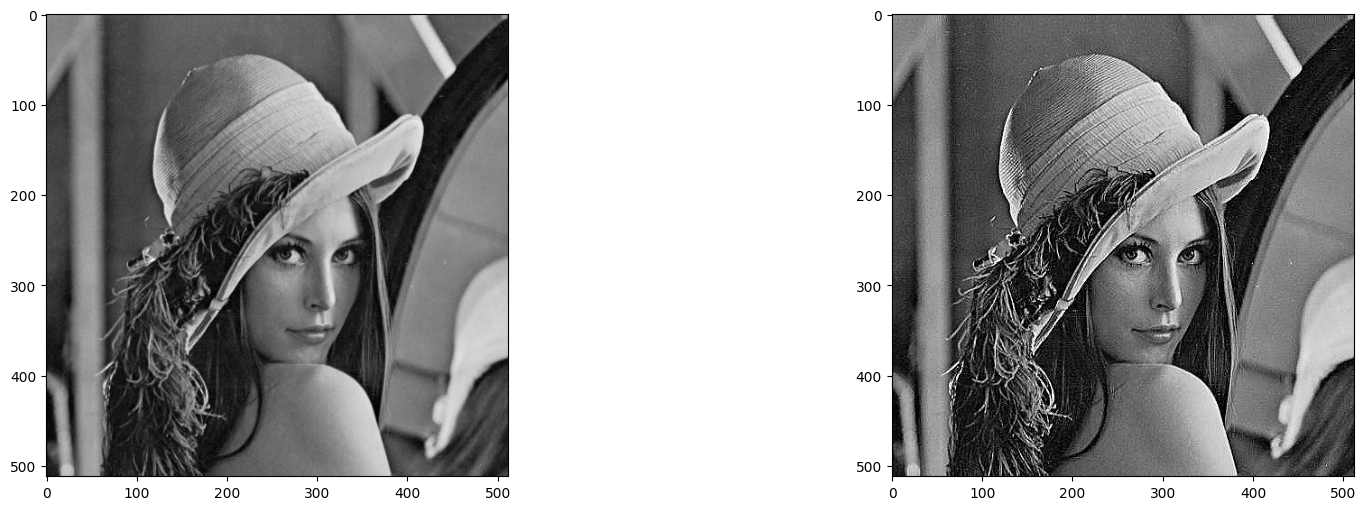

In [13]:
coeficientes = np.array([[0, 1, 0],
                         [1, -5, 1],
                         [0, 1, 0]])*-1
sharpened = cv2.filter2D(input_image, 0, coeficientes)
_, ax = plt.subplots(1, 2, squeeze=True, **{'figsize':[20.0, 6.0]})
ax[0].imshow(input_image, cmap='gray')
ax[1].imshow(sharpened, cmap='gray')
plt.show()

### Histograma

Un histograma es una gráfica en donde se muestra la frecuencia con las que aparecen los distintos niveles de intensidad de una imagen a escala de grises, normalmente el nivel de intensidad está en el rango de 0 a 255, en donde el valor 0 representa los color negro y 255 el color blanco, utilizando el histograma de una imagen podemos modificar sus características, por ejemplo, el brillo y contraste, existen además otras aplicaciones que veremos más adelante.

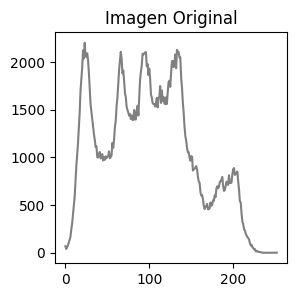

In [14]:
hist = cv2.calcHist(images=[input_image], channels=[0], mask = None, histSize=[img_max], ranges=[img_min, img_max])
plt.title('Imagen Original')
plt.plot(hist, color='gray')
plt.show()

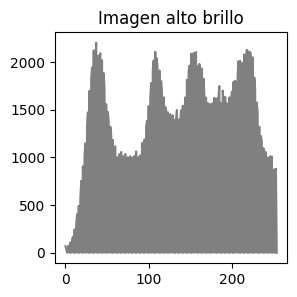

In [15]:
bright_image = bright_image.astype(np.uint8)
hist = cv2.calcHist(images=[bright_image], channels=[0], mask = None, histSize=[np.max(bright_image)], ranges=[np.min(bright_image), np.max(bright_image)])
plt.title('Imagen alto brillo')
plt.plot(hist, color='gray')
plt.show()

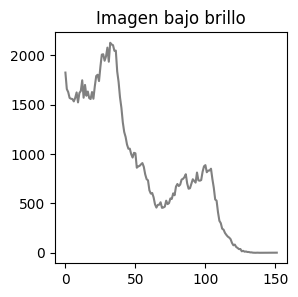

In [16]:
dim_image = dim_image.astype(np.uint8)
hist = cv2.calcHist(images=[dim_image], channels=[0], mask = None, histSize=[np.max(dim_image)], ranges=[np.min(dim_image), np.max(dim_image)])
plt.title('Imagen bajo brillo')
plt.plot(hist[1:], color='gray')
plt.show()

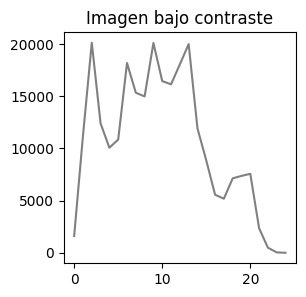

In [17]:
low_contrast = low_contrast.astype(np.uint8)
hist = cv2.calcHist(images=[low_contrast], channels=[0], mask = None, histSize=[np.max(low_contrast)], ranges=[np.min(low_contrast), np.max(low_contrast)])
plt.title('Imagen bajo contraste')
plt.plot(hist, color='gray')
plt.show()

## Transformaciones de una imagen

### Operaciones puntuales
El resultado de aplicarlas a un píxel depende únicamente del valor de intensidad de ese píxel.

Ya exploramos la **multiplicación por una constante** y sus efectos en el contraste y la **suma o resta de una constante** y sus efectos en el brillo de la imagen.

También se consideran operaciones como la umbralización: convertir una imagen en escala de grises a una imagen binaria (0 o 1) utilizando un umbral para la decisión, en la medida en que el umbral sea más alto, la imagen resultante será mayormente negra (0), y en el caso contrario será mayormente blanca (1).

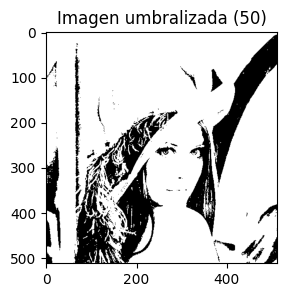

In [20]:
threshold = 50
img_umbral = np.uint8(input_image>threshold)
plt.title(f'Imagen umbralizada ({threshold})')
plt.imshow(img_umbral, cmap='gray')
plt.show()

In [23]:
np.unique(img_umbral)

array([0, 1], dtype=uint8)

Umbralización adaptativa

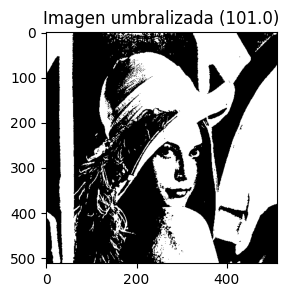

In [24]:
(T, threshInv) = cv2.threshold(input_image, 0, 255, cv2.THRESH_OTSU)
plt.title(f'Imagen umbralizada ({T})')
plt.imshow(threshInv, cmap='gray')
plt.show()

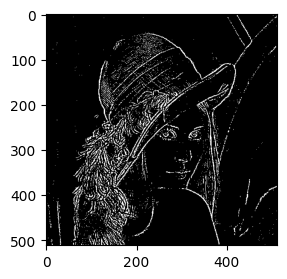

In [25]:
thresh = cv2.adaptiveThreshold(input_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 7, 10)
plt.imshow(thresh, cmap='gray')
plt.show()

Imagen inversa: equivalente a un negativo fotográfico. Ver el ejemplo del impacto en una mamografía.

<img src="src/inversa.png" alt="Imagen de mamografía y su inversa" style="height: 350px; width:700px;"/>

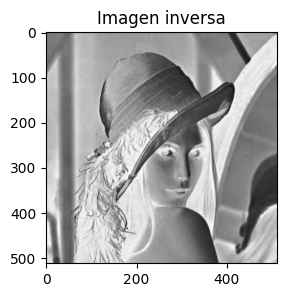

In [26]:
img_inversa = img_max - input_image
plt.title(f'Imagen inversa')
plt.imshow(img_inversa, cmap='gray')
plt.show()

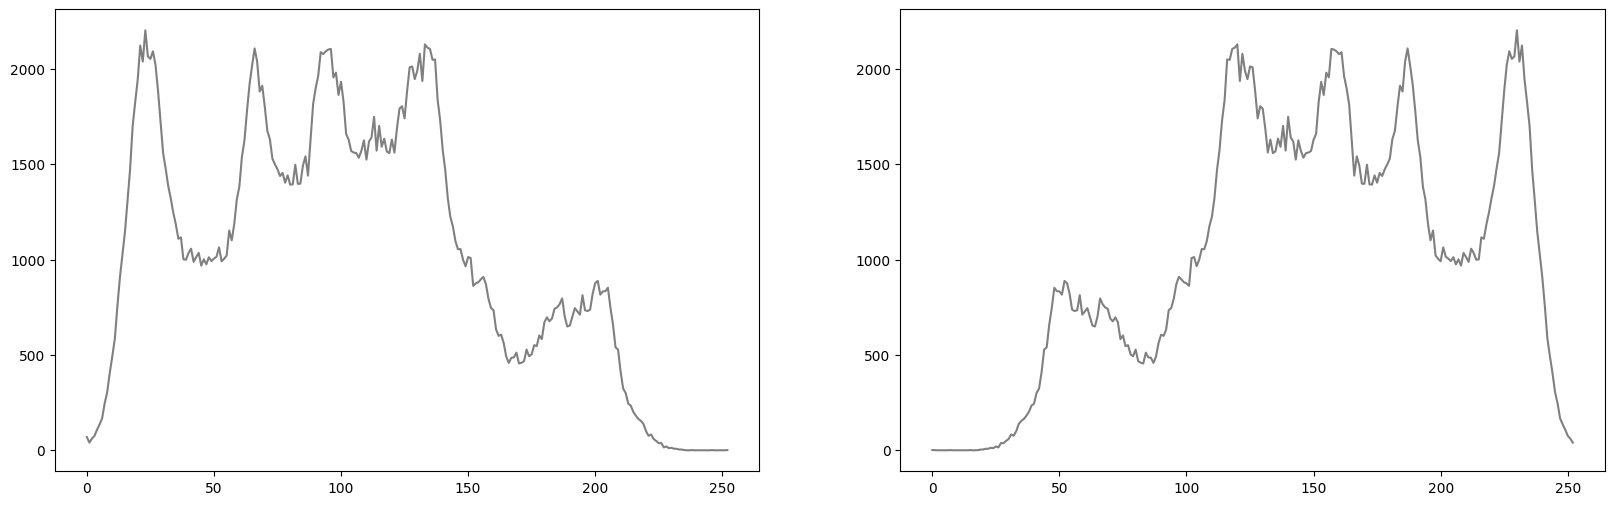

In [27]:
hist_orig = cv2.calcHist(images=[input_image], channels=[0], mask = None, histSize=[img_max], ranges=[img_min, img_max])
hist_inverse = cv2.calcHist(images=[img_inversa], channels=[0], mask = None, histSize=[np.max(img_inversa)], ranges=[np.min(img_inversa), np.max(img_inversa)])

_, ax = plt.subplots(1, 2, squeeze=True, **{'figsize':[20.0, 6.0]})
ax[0].plot(hist_orig, color='gray')
ax[1].plot(hist_inverse, color='gray')
plt.show()

Ecualización de histogramas: busca obtener una distribución uniforme de los distintos niveles de intensidad, esta técnica es muy utilizada para mejorar el contraste de las imágenes.

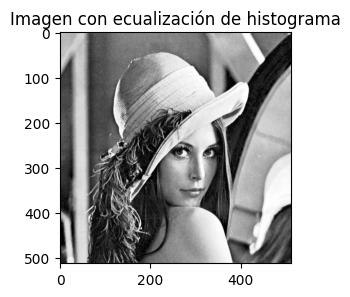

In [28]:
hist_eq_img = cv2.equalizeHist(input_image)
plt.title(f'Imagen con ecualización de histograma')
plt.imshow(hist_eq_img, cmap='gray')
plt.show()

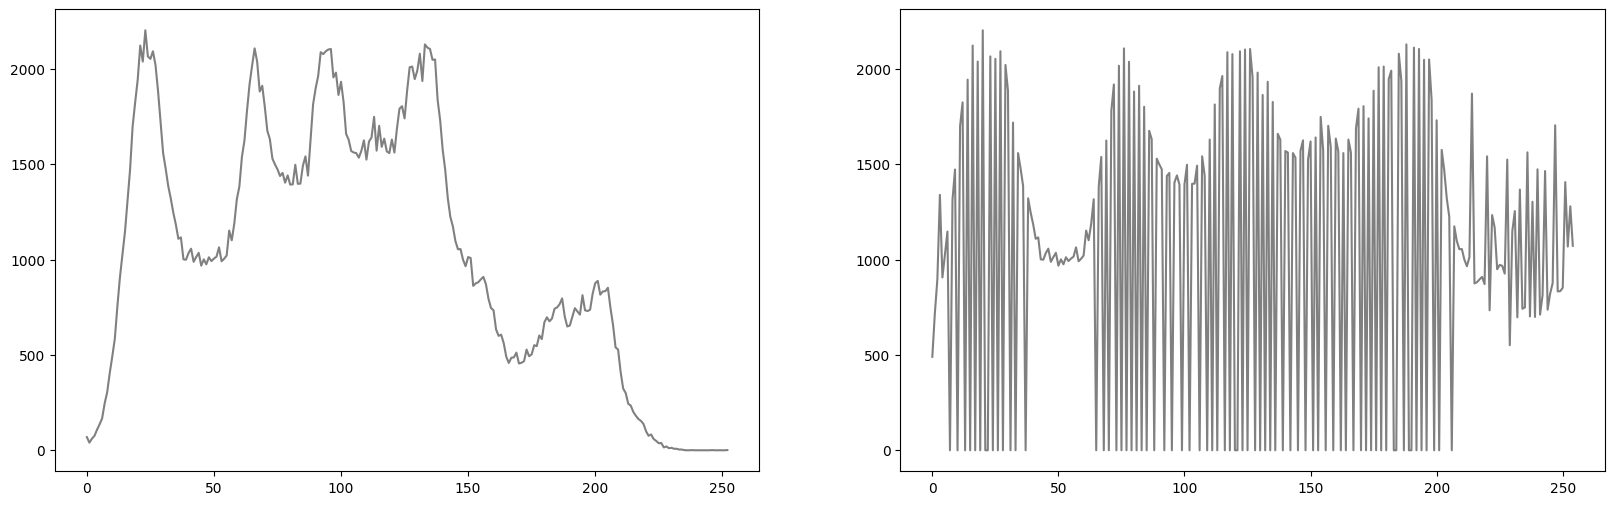

In [29]:
hist_orig = cv2.calcHist(images=[input_image], channels=[0], mask = None, histSize=[img_max], ranges=[img_min, img_max])
hist_eq = cv2.calcHist(images=[hist_eq_img], channels=[0], mask = None, histSize=[np.max(hist_eq_img)], ranges=[np.min(hist_eq_img), np.max(hist_eq_img)])

_, ax = plt.subplots(1, 2, squeeze=True, **{'figsize':[20.0, 6.0]})
ax[0].plot(hist_orig, color='gray')
ax[1].plot(hist_eq, color='gray')
plt.show()

Cambiar el número de bits en el que está representado una imagen

In [30]:
def k_bits(img, k_orig, k_new):
    a=np.power(2, k_orig-k_new)
    k_img=np.zeros(img.shape)
    for i in range(np.power(2, k_new)):
        val=np.full_like(k_img,i)
        for j in range(a):
            k_img+=(img==(j+a*i))*val
    return k_img

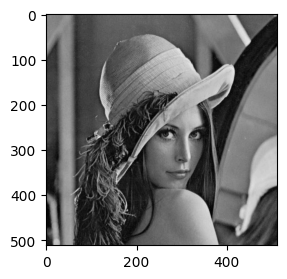

In [36]:
k_img = k_bits(input_image, 8, 6).astype(np.uint8)
plt.imshow(k_img, cmap='gray')
plt.show()

In [32]:
np.unique(k_img, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=uint8),
 array([36000, 36619, 54424, 54622, 44759, 19247, 16261,   212]))

Dividir una imagen en términos de bits [(Kaggle)](https://www.kaggle.com/code/siddheshmahajan/opencv-basics-bit-plane-slicing)

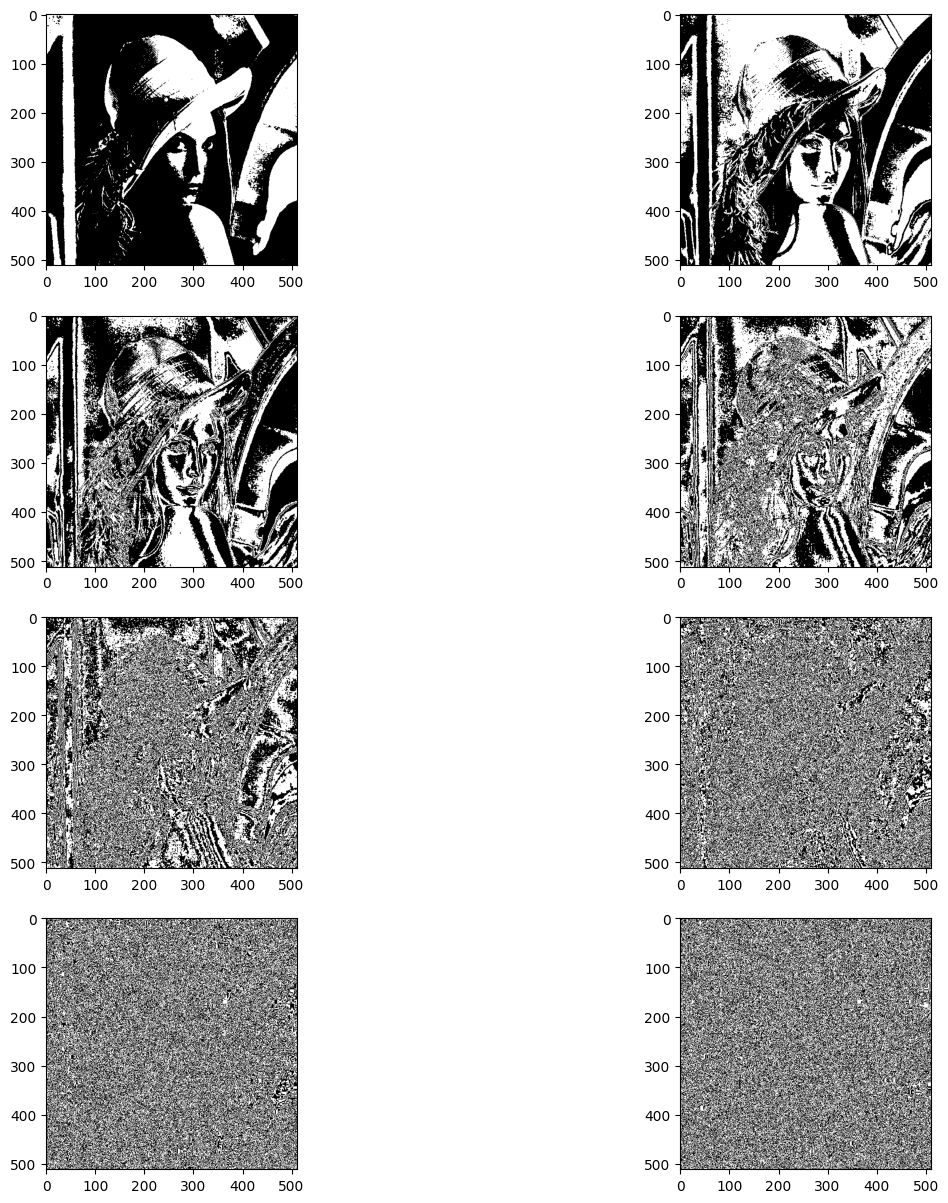

In [33]:
def cov_binary(num):
    binary_num = [int(i) for i in list('{0:0b}'.format(num))]
    for j in range(8 - len(binary_num)):
        binary_num.insert(0,0)        
    return binary_num

def conv_decimal(listt):
    x = 0
    for i in range(8):
        x = x + int(listt[i])*(2**(7-i))
    return x

def discriminate_bit(bit,img):
    shape = img.shape
    z = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            x = cov_binary(img[i][j])
            for k in range(8):
                if k == bit:
                    x[k] = x[k]
                else:
                    x[k] = 0
            x1 = conv_decimal(x)
            z[i][j] = x1
    return z

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

for i in range(1,9):
    fig.add_subplot(4,2,i)
    plt.imshow(discriminate_bit(i-1,input_image), cmap='gray')

plt.show(block=True)

### Operaciones geométricas

En las operaciones geométricas la posición de cada píxel en la imagen resultado depende de su posición en la imagen original.

Abarca operaciones como:
- Zoom
- Rotación
- Traslación
- Warping o distorsión.

Un caso particular es el redimensionamiento.

In [ ]:
scale_down = 0.2
res_inter_nearest = cv2.resize(input_image, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_NEAREST)
res_inter_linear = cv2.resize(input_image, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_LINEAR)
res_inter_area = cv2.resize(input_image, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_AREA)
res_inter_cubic = cv2.resize(input_image, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_CUBIC)

_, ax = plt.subplots(2, 2, **{'figsize':[10.0, 8.0]})
ax[0,0].imshow(res_inter_nearest, cmap='gray')
ax[0,0].title.set_text('Interpolation nearest')
ax[0,1].imshow(res_inter_linear, cmap='gray')
ax[0,1].title.set_text('Interpolation linear')
ax[1,0].imshow(res_inter_area, cmap='gray')
ax[1,0].title.set_text('Interpolation area')
ax[1,1].imshow(res_inter_cubic, cmap='gray')
ax[1,1].title.set_text('Interpolation cubic')
plt.show()

In [ ]:
scale_up = 2.5
res_inter_nearest = cv2.resize(input_image, None, fx= scale_up, fy= scale_up, interpolation= cv2.INTER_NEAREST)
res_inter_linear = cv2.resize(input_image, None, fx= scale_up, fy= scale_up, interpolation= cv2.INTER_LINEAR)
res_inter_area = cv2.resize(input_image, None, fx= scale_up, fy= scale_up, interpolation= cv2.INTER_AREA)
res_inter_cubic = cv2.resize(input_image, None, fx= scale_up, fy= scale_up, interpolation= cv2.INTER_CUBIC)

_, ax = plt.subplots(2, 2, **{'figsize':[10.0, 8.0]})
ax[0,0].imshow(res_inter_nearest, cmap='gray')
ax[0,0].title.set_text('Interpolation nearest')
ax[0,1].imshow(res_inter_linear, cmap='gray')
ax[0,1].title.set_text('Interpolation linear')
ax[1,0].imshow(res_inter_area, cmap='gray')
ax[1,0].title.set_text('Interpolation area')
ax[1,1].imshow(res_inter_cubic, cmap='gray')
ax[1,1].title.set_text('Interpolation cubic')
plt.show()

In [ ]:
(res_inter_nearest == res_inter_linear).all()

### Operaciones locales

La imagen se transforma en función de los niveles de gris de cada píxel considerado y de los de su entorno (filtros o kernels). Pueden ser:
- Lineales
- No lineales
    - Estadísticas
    - Analíticas
        - Media geométrica
        - Media armónica
- Morfológicas
    - Erosión
    - Dilatación
    - Adelgazamiento y esqueletización
    - Opening
    - Closing

### Operaciones globales

La imagen se transforma como una unidad, sin considerar los píxeles de forma individual. Generalmente representa un cambio de dominio.

Entre las más empleadas:
- Transformada de Fourier
- Transformada de Hadamard-Walsh
- Transformada de Karhunen-Lòeve
- Transformada discreta del coseno
- Transformada de Hough
- Cambio entre espacios de color